In [88]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
from os.path import exists
from os import mkdir as mk
import imageio

In [96]:
path = './images/'

if not exists(path):
  mk(path)

In [90]:
def graphic_setting(X, clusters, centroids, iter, path):
  fig, ax = plt.subplots(figsize=(12,8))

  for i, index in enumerate(clusters):
    point = X[index].T
    ax.scatter(*point)

  for point in centroids:
    ax.scatter(*point, marker='x', color='black', linewidths=2)

  plt.text(-1.6, 0.9, iter)
  plt.savefig(path+str(iter)+'.png')
  plt.close()

In [91]:
X, y = make_blobs(centers=3, n_samples=1000, n_features=2, shuffle=True, random_state=17)
k = len(np.unique(y))

print('X shape: ', X.shape)

X shape:  (1000, 2)


In [92]:
class KMeansClustering:
  def __init__(self, X, k, max_iter) -> None:
    self.X, self.k = X, k
    self.max_iter = max_iter

    self.n_samples, self.n_features = X.shape
    self.centroids = None
    self.cluster = None

  def euclidean_distance(self, sample, centroid):
    '''
      calcula apenas a distancia de 
      uma sample para um centroid
    '''
    return np.sqrt(np.sum((sample - centroid)**2))
  
  def create_random_centroids(self):
    '''
      cria randomicamente centroids de 
      acordo com o numero de k
    '''
    centroids = self.X[
      np.random.choice(
        self.n_samples, self.k, replace=False
      )
    ]
    return centroids
  
  def create_clusters(self, centroids):
    '''
      cria clusters e adiciona o index de cada 
      sample pertencente a cada cluster
    '''
    clusters = [[] for _ in range(self.k)]
    for i, sample in enumerate(self.X):
      distance = [self.euclidean_distance(sample, centroid) for centroid in centroids]
      cluster_idx = np.argmin(distance)
      clusters[cluster_idx].append(i)
    return clusters
  
  def update_centroids(self, clusters):
    '''
      atualiza a posição de cada centroid usando a média
      das samples pertencente a cada clusters
    '''
    centroids = np.zeros((self.k, self.n_features))
    for i, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[i] = cluster_mean
    return centroids
  
  def converged(self, old_centroids, centroids):
    '''
      calcula se as atualizações dos centroids
      converge para 0
    '''
    distance = [
      self.euclidean_distance(old_centroids[i], centroids[i]) for i in range(self.k)
    ]
    return sum(distance) == 0
  
  def fit(self):
    self.centroids = self.create_random_centroids()
    
    for iter in range(self.max_iter):
      self.cluster = self.create_clusters(self.centroids)
      
      old_centroids = self.centroids
      self.centroids = self.update_centroids(self.cluster)

      graphic_setting(self.X, self.cluster, self.centroids, iter, path)  
      
      if self.converged(old_centroids, self.centroids):
        break

In [97]:
model = KMeansClustering(X=X, k=k, max_iter=10000)
model.fit()

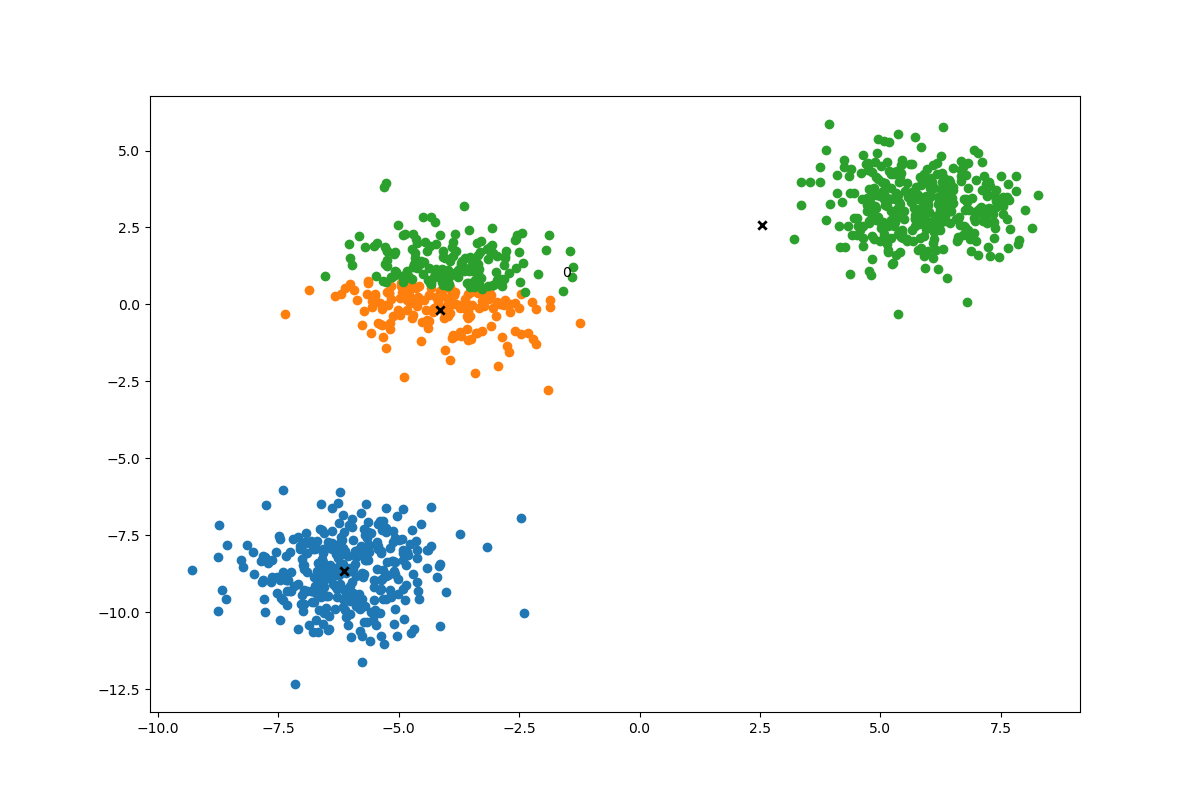

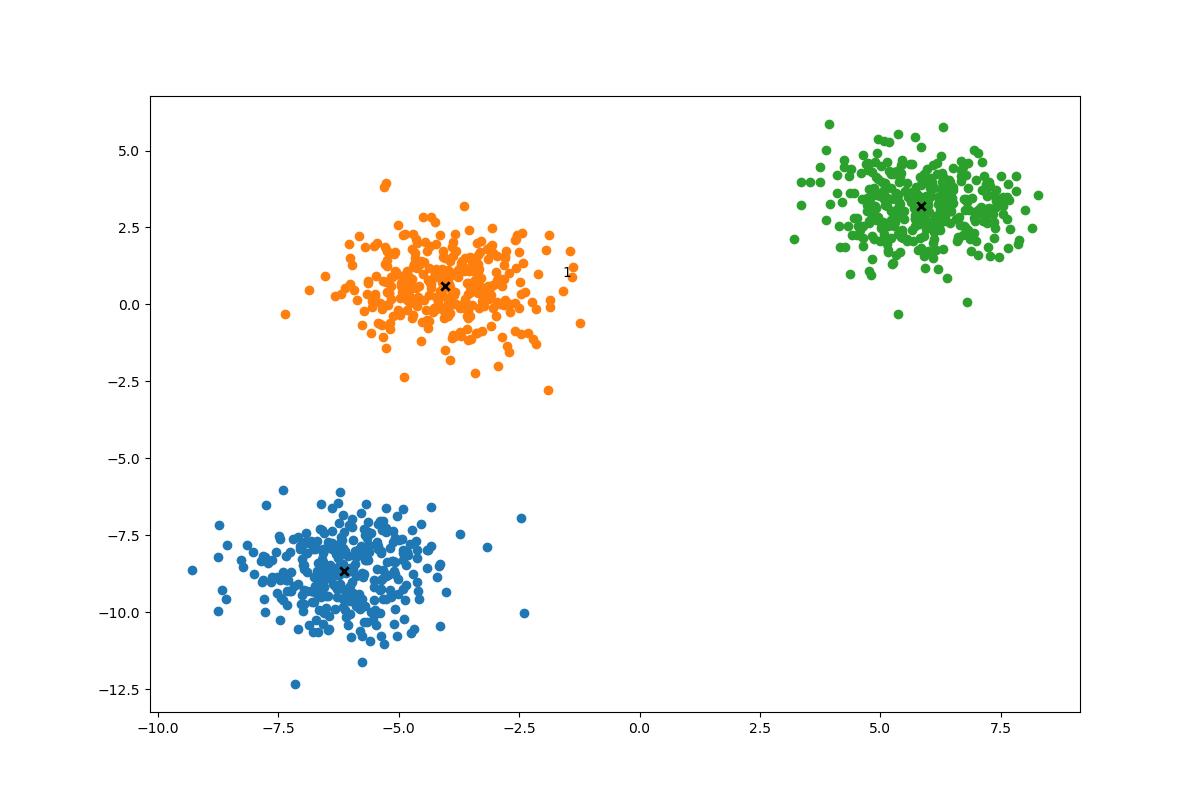

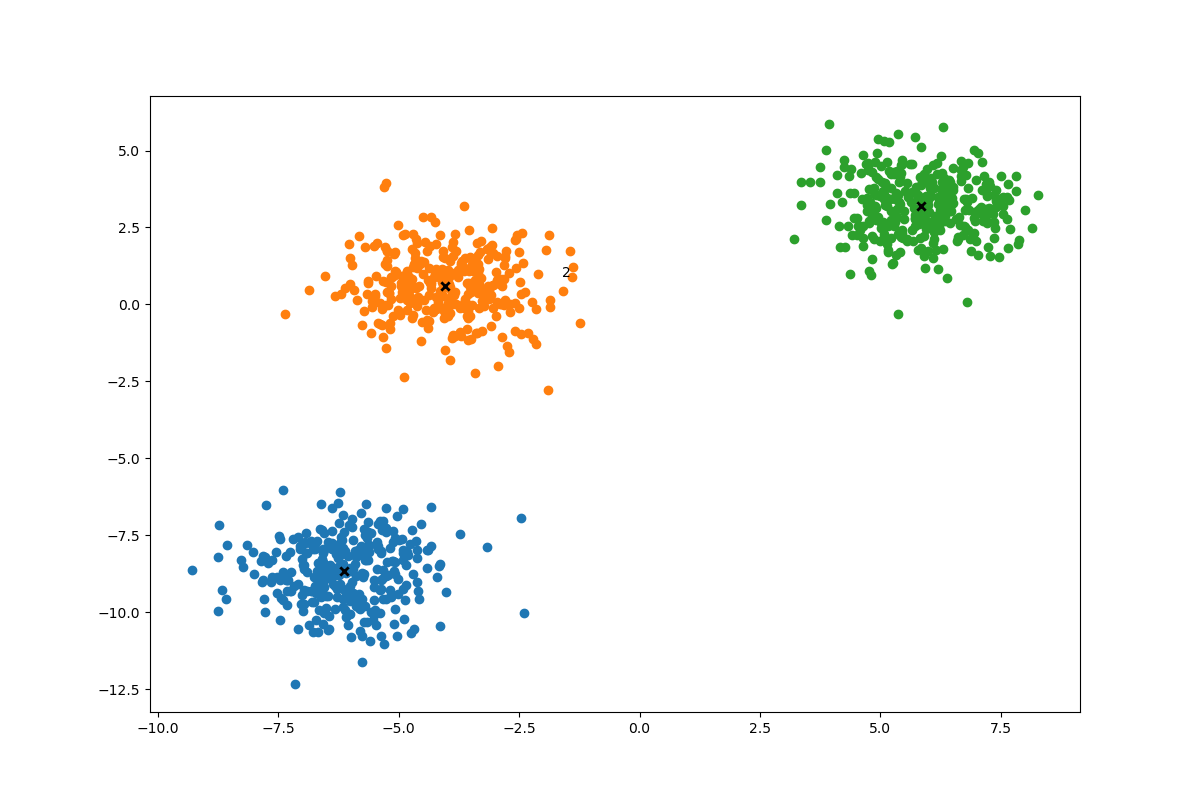

In [98]:
from IPython.display import Image, display

path_images = sorted(os.listdir('./images/'))

for image in path_images:
  display(Image(filename=f'./images/{image}'))
  